In this notebook we try to learn about autoencoders. We will use the MNIST dataset for this purpose. The notebook will cover the following steps:
1. Load and preprocess the MNIST dataset.
2. Build a simple autoencoder model.
3. Train the autoencoder on the MNIST dataset.
4. Visualize the original and reconstructed images.

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, Normalization

import matplotlib.pyplot as plt

2025-08-05 19:44:12.858933: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the MNIST dataset

In [2]:
# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), mode='constant')
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), mode='constant')
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

In [3]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

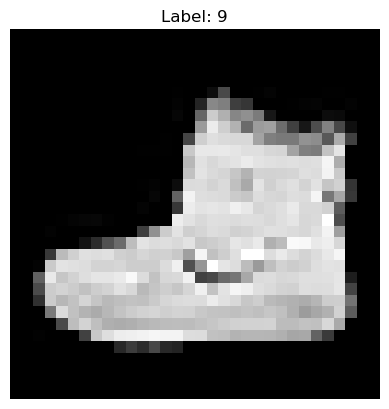

In [4]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

## Define the autoencoder model

In [5]:
# Clear any previous models and reset TensorFlow state
tf.keras.backend.clear_session()

# Reshape data to include channel dimension
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)

# Autoencoder architecture
input_img = Input(shape=(32, 32, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', strides=2, padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', strides=2, padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', strides=2, padding='same')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
latent = Dense(2, activation='linear', name='latent_vector')(x)  # 2D latent space

# Decoder - Use only one path
x = Dense(32, activation='relu')(latent)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(4 * 4 * 64, activation='relu')(x)
x = Reshape((4, 4, 64))(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', strides=2, padding='same')(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', strides=2, padding='same')(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', strides=2, padding='same')(x)

# Create models
encoder = Model(input_img, latent)
autoencoder = Model(input_img, decoded)

# Compile with appropriate loss function
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

print("Model compiled successfully!")

Model compiled successfully!


In [6]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 2)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 64)       │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395,651 (1.51 MB)

 Trainable params: 395,651 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

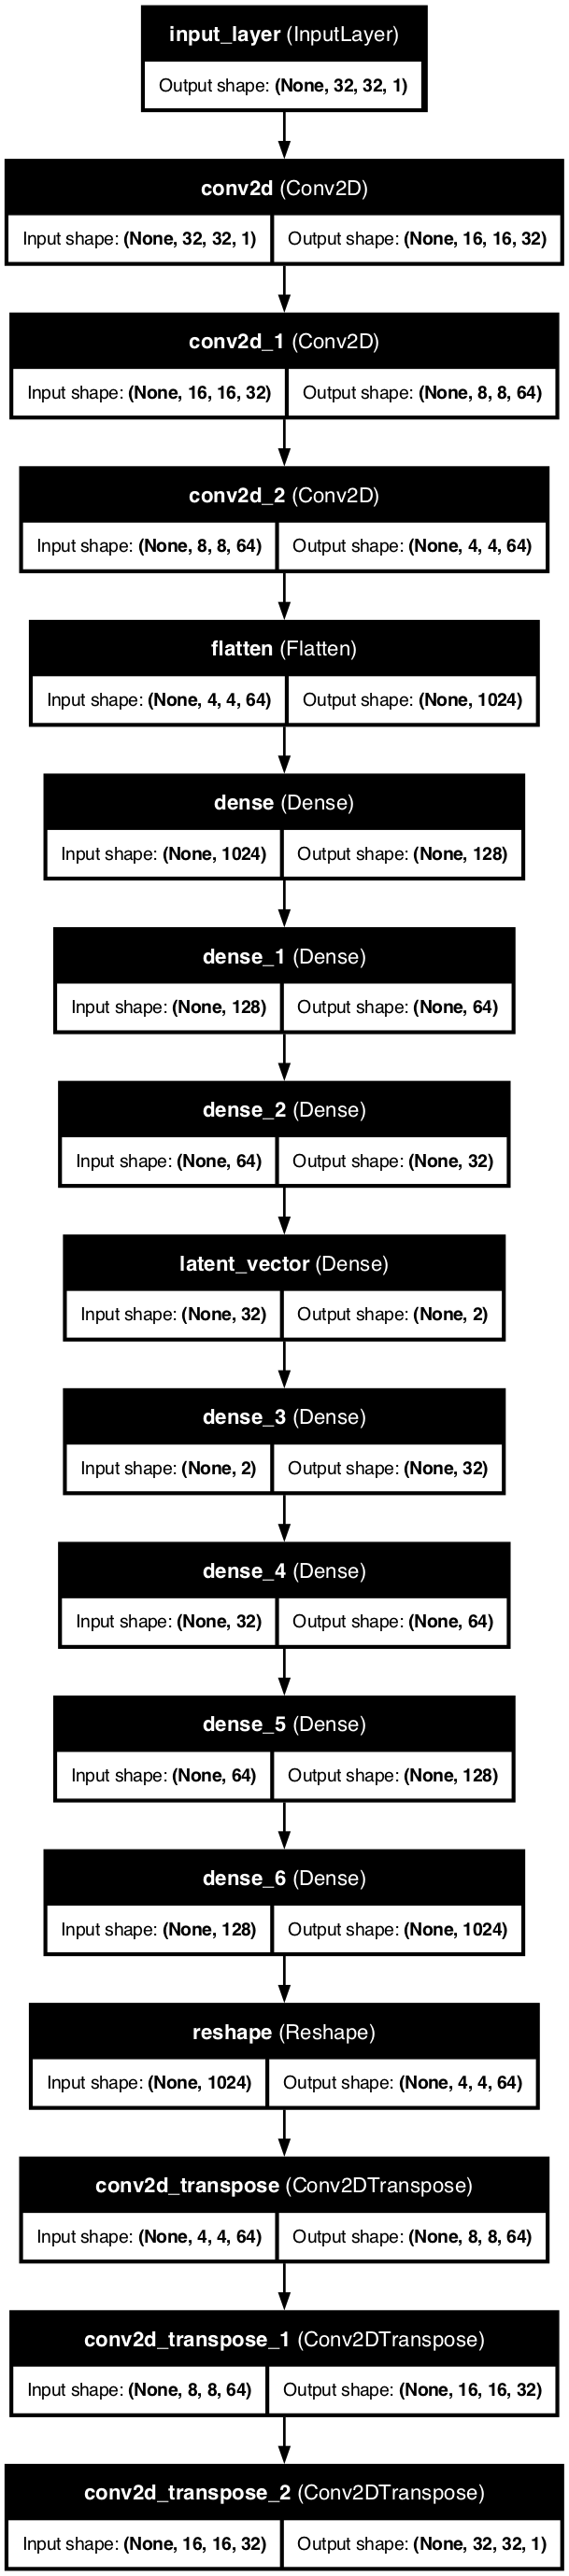

In [7]:
from keras.utils import plot_model
plot_model(autoencoder, show_shapes=True, show_layer_names=True, dpi=100, to_file='autoencoder_architecture.png')

## Fit the autoencoder model

In [8]:
# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                         epochs=10,
                         batch_size=256,
                         shuffle=True,
                         validation_data=(x_test, x_test),
                         verbose=1)

Epoch 1/10
122/235 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 0.5708 - mse: 0.1384

KeyboardInterrupt: 

## Visualize the latent space

Now that we have a variational autoencoder model, we can visualize its latent space and generate new samples. Below, we will visualize the latent space and generate new images by sampling from the latent space.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


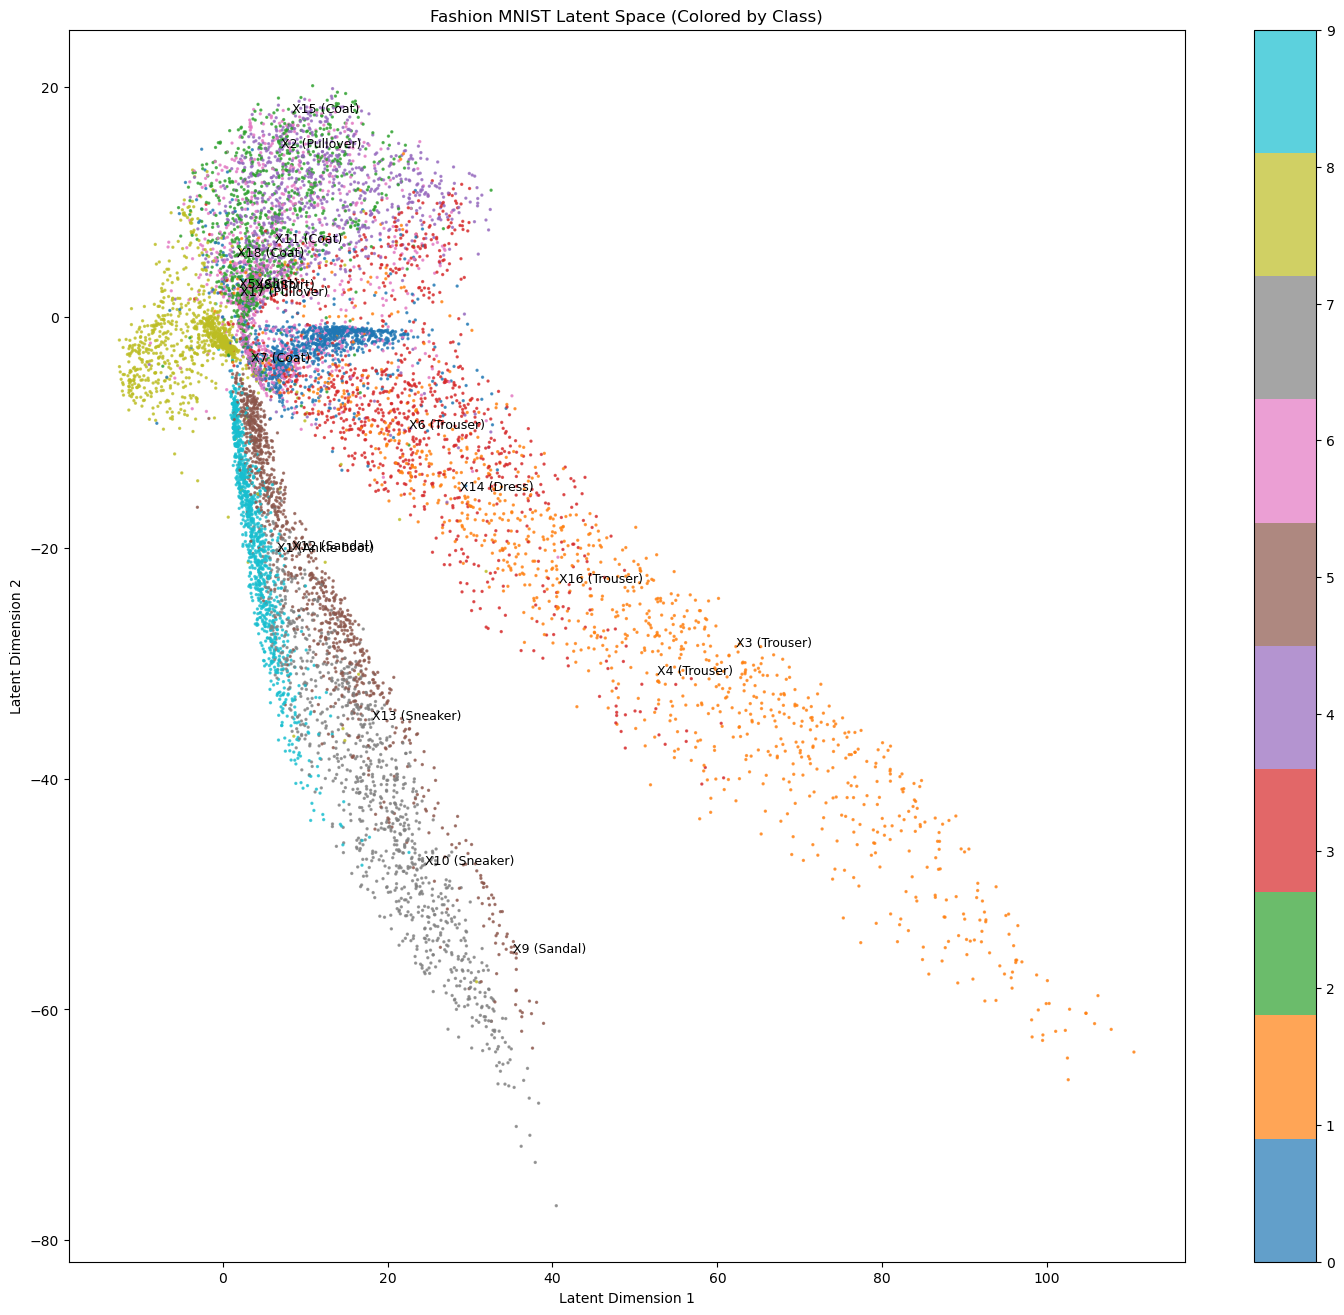

In [ ]:
# Encode test images to latent space
embeddings = encoder.predict(x_test)

# Visualize latent space
plt.figure(figsize=(18, 16))
scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], 
                     c=y_test, s=2, alpha=0.7, cmap='tab10')
plt.colorbar(scatter)
plt.title('Fashion MNIST Latent Space (Colored by Class)')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
# Plot the first 18 embeddings with a label X
for i in range(18):
    plt.text(embeddings[i, 0], embeddings[i, 1], f'X{i+1} ({labels[y_test[i]]})', fontsize=9)
plt.show()

## Generative a few samples from the test set and visualize the reconstructions

Using the autoencoder model, we can generate reconstructions of the input images and visualize them alongside the original images. This will help us understand how well the autoencoder has learned to compress and reconstruct the data.

In [ ]:
reconstructions = autoencoder.predict(x_test[:18])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


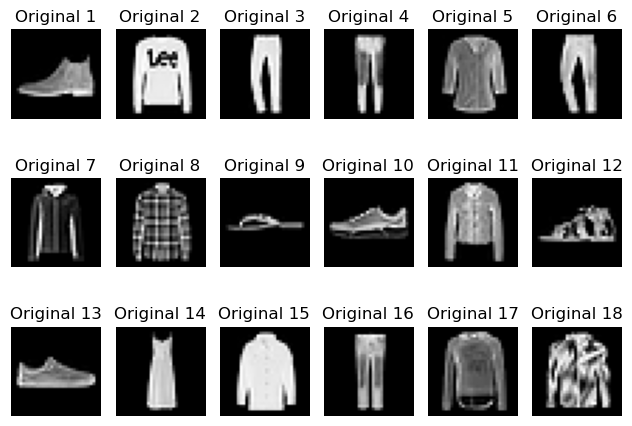

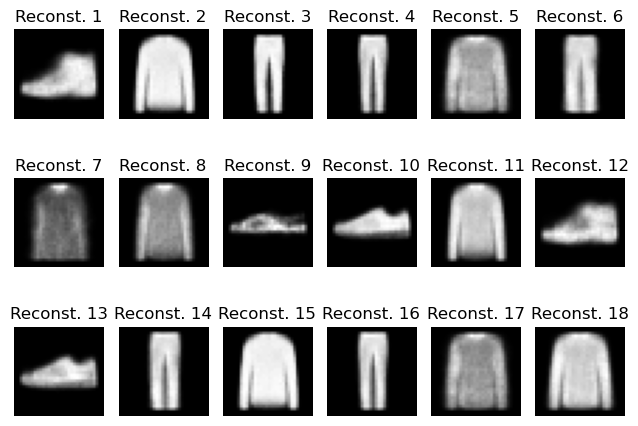

In [ ]:
# plot the reconstructions side by side with the original images. For this create a grid of images for 18 rows and 2 columns. In each row, the first column should show the original image and the second column should show the reconstructed image.
for i in range(18):
    plt.subplot(3, 6, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Original {i+1}")

plt.tight_layout()
plt.show()

for i in range(18):
    plt.subplot(3, 6, i + 1)
    plt.imshow(reconstructions[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Reconst. {i+1}")

plt.tight_layout()
plt.show()

You can see from above that the autoencoder has learned to reconstruct the images reasonably well, capturing the essential features of the input data. The reconstructions are not perfect, but they demonstrate the model's ability to learn a compressed representation of the data.

In summary, this highlights a weak point of the autoencoder: while it can reconstruct images, it may not always capture the underlying factors of variation in the data. The reason behind this is that traditional autoencoders tend to learn a latent space that does not necessarily reflect the true distribution of the data. They can often produce blurry or unrealistic reconstructions, especially when the input data has complex variations or noise. The input data basically gets mapped to a single point in the latent space, which can lead to a loss of information and diversity in the generated samples.

This is where variational autoencoders (VAEs) come into play, as they are designed to learn a more meaningful latent space representation.